In [1]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle


Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d khadijehvalipour/audio-classification
!unzip audio-classification.zip

Dataset URL: https://www.kaggle.com/datasets/khadijehvalipour/audio-classification
License(s): unknown
 94% 30.0M/31.9M [00:00<00:00, 77.4MB/s]
100% 31.9M/31.9M [00:00<00:00, 66.6MB/s]
Archive:  audio-classification.zip
  inflating: raw_data/abdollah.ogg   
  inflating: raw_data/amirhossein.ogg  
  inflating: raw_data/azra.ogg       
  inflating: raw_data/davood.ogg     
  inflating: raw_data/javad.ogg      
  inflating: raw_data/khadijeh_1.ogg  
  inflating: raw_data/khadijeh_2.ogg  
  inflating: raw_data/kiana.ogg      
  inflating: raw_data/maryam.ogg     
  inflating: raw_data/matin.ogg      
  inflating: raw_data/melika.ogg     
  inflating: raw_data/mohadeseh.ogg  
  inflating: raw_data/mohammad.ogg   
  inflating: raw_data/mohammad_parvari.ogg  
  inflating: raw_data/mona.m4a       
  inflating: raw_data/nahid.ogg      
  inflating: raw_data/nima.ogg       
  inflating: raw_data/omid.ogg       
  inflating: raw_data/parisa.ogg     
  inflating: raw_data/parsa.ogg      
  inflati

In [3]:
pip install pydub


In [4]:
import os
from pydub import AudioSegment

def convert_to_wav(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.ogg') or file_name.endswith('.m4a'):
            audio = AudioSegment.from_file(os.path.join(input_folder, file_name))
            output_file_name = os.path.splitext(file_name)[0] + '.wav'
            audio.export(os.path.join(output_folder, output_file_name), format='wav')
            print(f"Converted {file_name} to {output_file_name}")
input_folder = 'raw_data'
output_folder = 'raw_data_2'
convert_to_wav(input_folder, output_folder)

Converted mohammad.ogg to mohammad.wav
Converted nahid.ogg to nahid.wav
Converted khadijeh_2.ogg to khadijeh_2.wav
Converted sajedeh.ogg to sajedeh.wav
Converted mohammad_parvari.ogg to mohammad_parvari.wav
Converted mohadeseh.ogg to mohadeseh.wav
Converted maryam.ogg to maryam.wav
Converted azra.ogg to azra.wav
Converted davood.ogg to davood.wav
Converted kiana.ogg to kiana.wav
Converted tara.ogg to tara.wav
Converted nima.ogg to nima.wav
Converted melika.ogg to melika.wav
Converted parsa.ogg to parsa.wav
Converted omid.ogg to omid.wav
Converted abdollah.ogg to abdollah.wav
Converted javad.ogg to javad.wav
Converted mona.m4a to mona.wav
Converted khadijeh_1.ogg to khadijeh_1.wav
Converted amirhossein.ogg to amirhossein.wav
Converted matin.ogg to matin.wav
Converted parisa.ogg to parisa.wav
Converted shima.ogg to shima.wav


In [5]:
import os
from pydub import AudioSegment

def split_audio_into_parts(file_path, output_dir, num_parts=100):
    audio = AudioSegment.from_file(file_path)
    part_length = len(audio) // num_parts
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    current_output_dir = os.path.join(output_dir, file_name)
    os.makedirs(current_output_dir, exist_ok=True)
    for i in range(num_parts):
        start_time = i * part_length
        end_time = (i + 1) * part_length if i < num_parts - 1 else len(audio)
        audio_part = audio[start_time:end_time]
        output_file_path = os.path.join(current_output_dir, f"{file_name}_part_{i + 1}.wav")
        audio_part.export(output_file_path, format="wav")
        print(f"Exported {output_file_path}")

def process_audio_files(input_dir, output_dir, num_parts=100):
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(input_dir, file_name)
            split_audio_into_parts(file_path, output_dir, num_parts)

input_directory = 'raw_data_2'
output_directory = 'input'
process_audio_files(input_directory, output_directory)


Exported input/parsa/parsa_part_1.wav
Exported input/parsa/parsa_part_2.wav
Exported input/parsa/parsa_part_3.wav
Exported input/parsa/parsa_part_4.wav
Exported input/parsa/parsa_part_5.wav
Exported input/parsa/parsa_part_6.wav
Exported input/parsa/parsa_part_7.wav
Exported input/parsa/parsa_part_8.wav
Exported input/parsa/parsa_part_9.wav
Exported input/parsa/parsa_part_10.wav
Exported input/parsa/parsa_part_11.wav
Exported input/parsa/parsa_part_12.wav
Exported input/parsa/parsa_part_13.wav
Exported input/parsa/parsa_part_14.wav
Exported input/parsa/parsa_part_15.wav
Exported input/parsa/parsa_part_16.wav
Exported input/parsa/parsa_part_17.wav
Exported input/parsa/parsa_part_18.wav
Exported input/parsa/parsa_part_19.wav
Exported input/parsa/parsa_part_20.wav
Exported input/parsa/parsa_part_21.wav
Exported input/parsa/parsa_part_22.wav
Exported input/parsa/parsa_part_23.wav
Exported input/parsa/parsa_part_24.wav
Exported input/parsa/parsa_part_25.wav
Exported input/parsa/parsa_part_26

In [6]:
!pip install librosa

In [17]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [18]:
import librosa
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

def feature_extraction(file_path, max_frames=401):
    try:
        wave_x, sample_rate = librosa.load(file_path)
        mfccs = librosa.feature.mfcc(y=wave_x, sr=sample_rate, n_mfcc=20)
        if mfccs.shape[1] < max_frames:
            padded_mfccs = np.pad(mfccs, ((0, 0), (0, max_frames - mfccs.shape[1])), mode='constant')
        else:
            padded_mfccs = mfccs[:, :max_frames]
        return padded_mfccs
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

main_dir = 'input'  # Update this path as needed

all_features = []
all_labels = []

for dirpath, dirnames, filenames in os.walk(main_dir):
    for file in filenames:
        if file.endswith('.wav'):
            file_path = os.path.join(dirpath, file)
            if os.path.exists(file_path):
                features = feature_extraction(file_path)
                if features is not None:
                    all_features.append(features.flatten())  # Flatten to make it a single vector
                    all_labels.append(os.path.basename(dirpath))  # Label is the subfolder name

all_features_array = np.array(all_features)
all_labels_array = np.array(all_labels)


label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels_array)

num_classes = len(np.unique(encoded_labels))

X_train, X_test, y_train, y_test = train_test_split(all_features_array, encoded_labels, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

print(random_forest)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

Random_forest_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred)
Random_forest_results



RandomForestClassifier(max_depth=10, random_state=42)


{'accuracy': 99.1304347826087,
 'precision': 0.9917306735648194,
 'recall': 0.991304347826087,
 'f1': 0.9913030443667451}

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

Decision_tree_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred)
Decision_tree_results



{'accuracy': 92.17391304347827,
 'precision': 0.9268467162011556,
 'recall': 0.9217391304347826,
 'f1': 0.9228031690671751}

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

Logestic_regression_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred)
Logestic_regression_results


{'accuracy': 98.26086956521739,
 'precision': 0.983157894736842,
 'recall': 0.9826086956521739,
 'f1': 0.9827184483551581}

In [21]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

XG_boost_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred)
XG_boost_results



{'accuracy': 97.82608695652173,
 'precision': 0.9805122873345934,
 'recall': 0.9782608695652174,
 'f1': 0.9786735516818215}

In [22]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize the Lasso model
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.1, random_state=42))

# Train the Lasso model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Round the predictions and convert to integers

Lasso_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred)
Lasso_results


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 18.26086956521739,
 'precision': 0.19192712636621115,
 'recall': 0.1826086956521739,
 'f1': 0.17382288224148526}

In [23]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize the Ridge model
ridge_model = make_pipeline(StandardScaler(), RidgeClassifier(alpha=1.0, random_state=42))

# Train the Ridge model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

Ridge_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred)
Ridge_results


{'accuracy': 96.95652173913044,
 'precision': 0.9715331064816191,
 'recall': 0.9695652173913043,
 'f1': 0.9699749846785023}

In [24]:
from re import S
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Initialize the SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0, random_state=42))

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

SVM_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred)
SVM_results


{'accuracy': 99.56521739130434,
 'precision': 0.9960662525879918,
 'recall': 0.9956521739130435,
 'f1': 0.9957197938463924}

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Initialize the MLP classifier
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(random_state=42))

# Train the MLP classifier on the training data
mlp_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp_model.predict(X_test)

MLP_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred)
MLP_results

{'accuracy': 99.34782608695653,
 'precision': 0.9937901701323252,
 'recall': 0.9934782608695653,
 'f1': 0.9934296983210026}

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

Gradient_boosting_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred)
Gradient_boosting_results


{'accuracy': 94.78260869565217,
 'precision': 0.9553355313449995,
 'recall': 0.9478260869565217,
 'f1': 0.9492845821973737}

In [28]:
# Combine model results into a dataframe
import pandas as pd
all_model_results = pd.DataFrame({"Random Forest": Random_forest_results,
                                  "Decision Tree": Decision_tree_results,
                                  "Logestic Regression": Logestic_regression_results,
                                  "XG Boost": XG_boost_results,
                                  "Lasso": Lasso_results,
                                  "Ridge": Ridge_results,
                                  "SVM":SVM_results,
                                  "MLP":MLP_results,
                                  "Gradient Boosting":Gradient_boosting_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
Random Forest,99.130435,0.991731,0.991304,0.991303
Decision Tree,92.173913,0.926847,0.921739,0.922803
Logestic Regression,98.260870,0.983158,0.982609,0.982718
XG Boost,97.826087,0.980512,0.978261,0.978674
Lasso,18.260870,0.191927,0.182609,0.173823
Ridge,96.956522,0.971533,0.969565,0.969975
SVM,99.565217,0.996066,0.995652,0.995720
MLP,99.347826,0.993790,0.993478,0.993430
Gradient Boosting,94.782609,0.955336,0.947826,0.949285


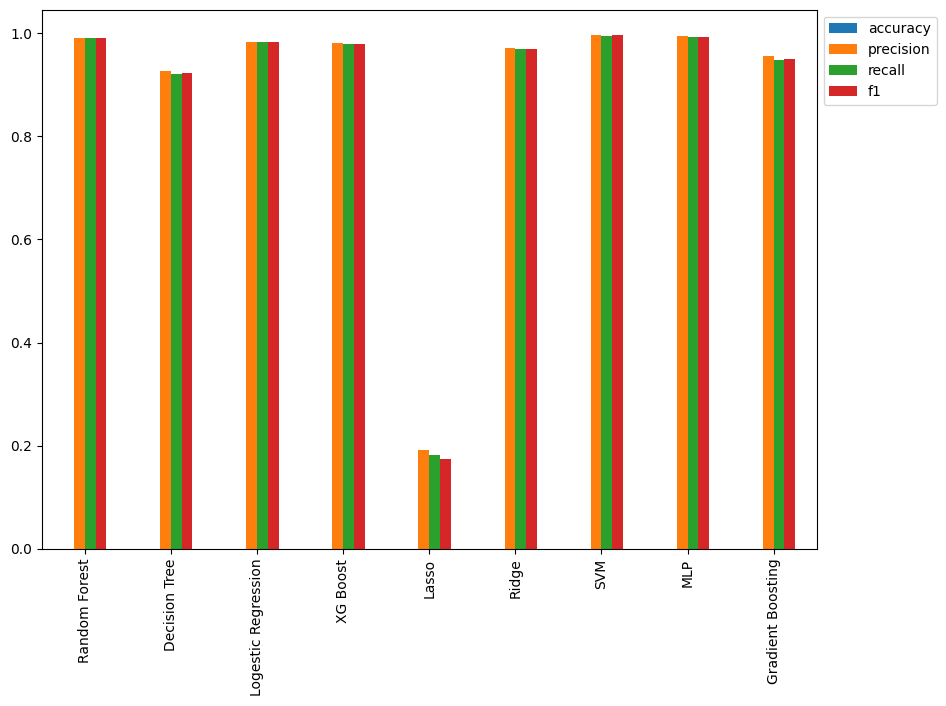

In [35]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100


# Plot and compare all model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

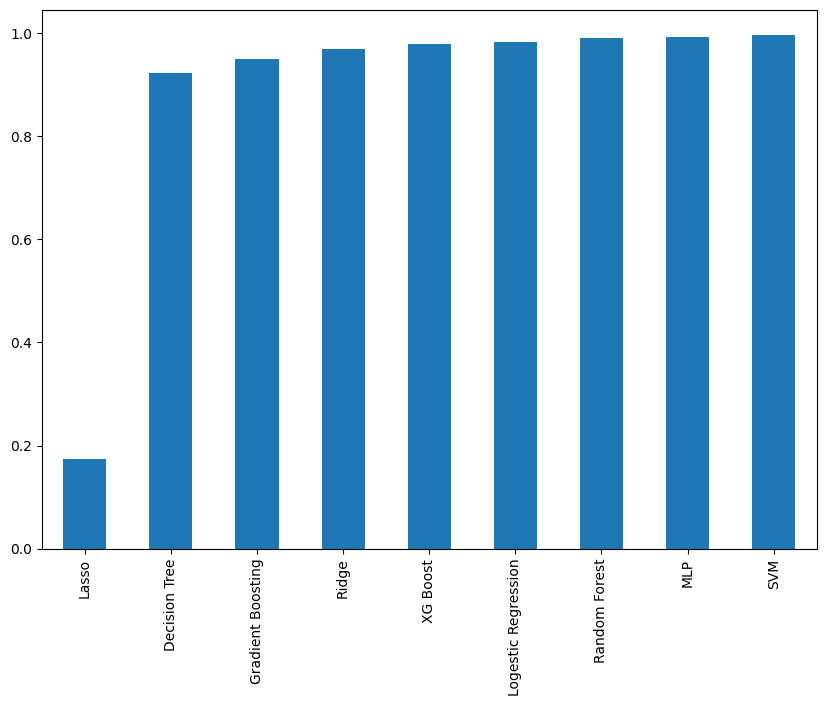

In [30]:
# Sort models results by f1-score
all_model_results.sort_values("accuracy", ascending=True)["f1"].plot(kind="bar", figsize=(10, 7));